# 토픽 모델링(Topic Modeling)
토픽 모델링(Topic Modeling)이란 기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나

텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법

# 잠재 의미 분석(Latent Semantic Analysis, LSA)
BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도 수를 이용한 수치화 방법이기 때문에 단어의 의미를 고려하지 못한다는 단점이 있음

이를 위한 대안으로 DTM의 잠재된(Latent) 의미를 이끌어내는 방법으로 잠재 의미 분석(Latent Semantic Analysis, LSA)이라는 방법이 있음

LSA는 기본적으로 DTM이나 TF-IDF 행렬에 절단된 SVD(truncated SVD)를 사용하여 차원을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다는 아이디어를 갖고 있음

실습을 통해서 이해
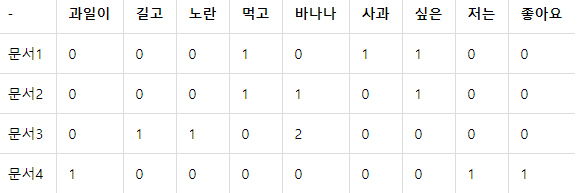

위와 같은 DTM을 실제로 파이썬을 통해서 만들면 아래와 같음

In [29]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

(4, 9)

4 × 9의 크기를 가지는 DTM이 생성<br/>
이에 대해서 풀 SVD(full SVD)를 수행

In [17]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [18]:
print(U.round(2))
np.shape(U)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


(4, 4)

4 × 4의 크기를 가지는 직교 행렬 U가 생성됨. 이제 대각 행렬 S를 확인

In [19]:
print(s.round(2))
np.shape(s)

[2.69 2.05 1.73 0.77]


(4,)

Numpy의 linalg.svd()는 특이값 분해의 결과로 대각 행렬이 아니라 특이값의 리스트를 반환.
그러므로 앞서 본 수식의 형식으로 보려면 이를 다시 대각 행렬로 바꾸어 주어야 함

In [20]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

4 × 9의 크기를 가지는 대각 행렬 S가 생성되었음. 2.69 > 2.05 > 1.73 > 0.77 순으로 값이 내림차순을 보이는 것을 확인

In [21]:
print(VT.round(2))
np.shape(VT)

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

9 × 9의 크기를 가지는 직교 행렬 VT(V의 전치 행렬)가 생성되었습니다. 즉, U × S × VT를 하면 기존의 행렬 A가 나와야 함.

Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴. Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴

In [22]:
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

지금까지 수행한 것은 풀 SVD(Full SVD). 이제 t를 정하고, 절단된 SVD(Truncated SVD)를 수행.

여기서는 t=2로 지정.

In [23]:
S=S[:2,:2]
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


상위 2개의 값만 남기고 나머지는 모두 제거된 것을 볼 수 있음. 이제 직교 행렬 U에 대해서도 2개의 열만 남기고 제거

In [24]:
U=U[:,:2]
print(U.round(2))

[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


2개의 열만 남기고 모두 제거된 것을 확인. 이제 행렬 V의 전치 행렬인 VT에 대해서 2개의 행만 남기고 제거. 

In [25]:
VT=VT[:2,:]
print(VT.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


이제 축소된 행렬 U, S, VT에 대해서 다시 U × S × VT연산을 하면 기존의 A와는 다른 결과가 나오게 됨.

값이 손실되었기 때문에 이 세 개의 행렬로는 이제 기존의 A행렬을 복구할 수 없습니다. U × S × VT연산을 해서 나오는 값을 A_prime이라 하고 기존의 행렬 A와 값을 비교

In [26]:
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.    0.    0.    0.  ]]


대체적으로 기존에 0인 값들은 0에 가가운 값이 나오고, 1인 값들은 1에 가까운 값이 나오는 것을 확인

## 실습을 통한 이해
사이킷런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터를 제공

여기서는 LSA를 사용해서 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력하는 실습으로 토픽 모델링을 수행

### 뉴스그룹 데이터에 대한 이해

In [27]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

훈련에 사용할 뉴스그룹 데이터는 총 11,314개입니다. 이 중 첫번째 훈련용 샘플을 출력

In [28]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

뉴스그룹 데이터에는 특수문자가 포함된 다수의 영어문장으로 구성되어져 있음. 이런 형식의 샘플이 총 11,314개 존재합니다. 사이킷런이 제공하는 뉴스그룹 데이터에서 target_name에는 본래 이 뉴스그룹 데이터가 어떤 20개의 카테고리를 갖고있었는지가 저장되어져 있습니다. 이를 출력

In [30]:
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## 텍스트 전처리
작하기 앞서, 텍스트 데이터에 대해서 가능한한 정제 과정을 거쳐야만 함

기본적인 아이디어는 알파벳을 제외한 구두점, 숫자, 특수 문자를 제거하는 것

In [31]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-31-b4124dfb5e6a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [32]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

불용어를 제거하기 위해서 토큰화를 우선 수행. 후에 불용어 제거

In [33]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.

In [34]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


## TF-IDF 행렬 만들기
불용어 제거를 위해 토큰화 작업을 수행하였지만, TfidfVectorizer(TF-IDF 챕터 참고)는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용.

그렇기 때문에 TfidfVectorizer를 사용해서 TF-IDF 행렬을 만들기 위해서 다시 토큰화 작업을 역으로 취소하는 작업을 수행. 이를 역토큰화라 함

In [37]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

정상적으로 불용어가 제거된 상태에서 역토큰화가 수행되었음을 확인

이제 사이킷런의 TfidfVectorizer를 통해 단어 1,000개에 대한 TF-IDF 행렬을 만들 것

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

(11314, 1000)

## 토픽 모델링(Topic Modeling)
이제 TF-IDF 행렬을 다수의 행렬로 분해. 여기서는 사이킷런의 절단된 SVD(Truncated SVD)를 사용

원래 기존 뉴스그룹 데이터가 20개의 카테고리를 갖고있었기 때문에, 20개의 토픽을 가졌다고 가정하고 토픽 모델링을 시도

In [40]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [41]:
np.shape(svd_model.components_)#svd_modle은 VT에 해당

(20, 1000)

정확하게 토픽의 수 t × 단어의 수의 크기를 가지는 것을 확인

In [42]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

## LSA의 장단점(Pros and Cons of LSA)
정리해보면 LSA는 쉽고 빠르게 구현이 가능할 뿐만 아니라 단어의 잠재적인 의미를 이끌어낼 수 있어 문서의 유사도 계산 등에서 좋은 성능을 보여준다는 장점을 갖고 있음.

하지만 SVD의 특성상 이미 계산된 LSA에 새로운 데이터를 추가하여 계산하려고하면 보통 처음부터 다시 계산해야 함